Most Liveable and Affordable Suburb:
     addressSuburb  addressPostcode  liveability_score  affordability_score  \
12   HAWTHORN EAST           3123.0           0.832474             0.844632   
11        HAWTHORN           3122.0           0.810577             0.820608   
20  MELBOURNE 3004           3004.0           0.671386             0.950673   

    overall_score  
12       0.838553  
11       0.815593  
20       0.811030  

Characteristics of Top Suburb:
Average IEO_Score: 1107.47
Average IER_Score: 968.06
Average distance_to_closest_station: 3.24
Average min_distance_to_shopping_mall: 8.96
Average min_distance_to_secondary_school: 1.61
Average min_distance_to_park: 0.77
Average price: 610.79


/var/folders/v4/fkjvg0h5705_l9cds060zs240000gn/T/ipykernel_13687/2059737919.py:79: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  g = sns.scatterplot(data=top_suburb, x='liveability_score',


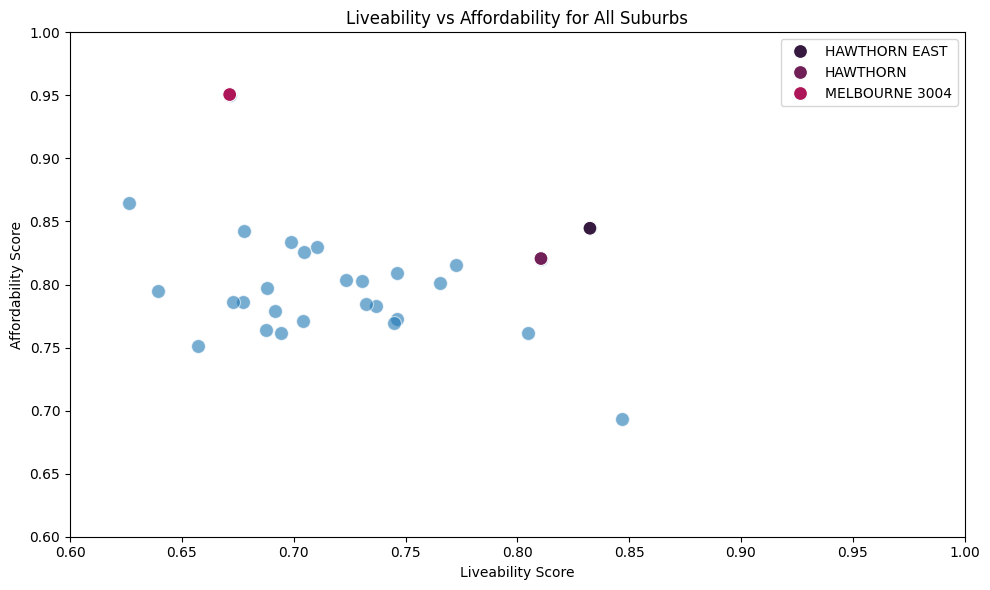

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('combine_all.csv')
df = df.dropna()
# Define metrics for liveability and affordability
liveability_metrics = [
    'IEO_Score',  # Education and occupation opportunities
    'IER_Score',  # Economic resources
    'distance_to_closest_station',  # Public transport accessibility
    'min_distance_to_shopping_mall',  # Access to amenities
    'min_distance_to_secondary_school',  # Access to education
    'min_distance_to_park'  # Access to green spaces
]

affordability_metrics = [
    'price'  # Assuming this is the rental price
]

# Create a copy of the dataframe with only the relevant columns
suburbs_df = df[['addressSuburb', 'addressPostcode'] + liveability_metrics + affordability_metrics].copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the metrics
for column in liveability_metrics + affordability_metrics:
    if column.startswith('min_distance'):
        # For distance metrics, lower is better, so we invert the scale
        suburbs_df[f'{column}_normalized'] = 1 - scaler.fit_transform(suburbs_df[[column]])
    else:
        suburbs_df[f'{column}_normalized'] = scaler.fit_transform(suburbs_df[[column]])

# Invert the price scale (lower price is better)
suburbs_df['price_normalized'] = 1 - suburbs_df['price_normalized']

# Calculate liveability and affordability scores
liveability_columns = [f'{col}_normalized' for col in liveability_metrics]
affordability_columns = [f'{col}_normalized' for col in affordability_metrics]

suburbs_df['liveability_score'] = suburbs_df[liveability_columns].mean(axis=1)
suburbs_df['affordability_score'] = suburbs_df[affordability_columns].mean(axis=1)

# Calculate overall score (equal weight to liveability and affordability)
suburbs_df['overall_score'] = (suburbs_df['liveability_score'] + suburbs_df['affordability_score']) / 2

# Sort by overall score and select top 20
top_suburbs = suburbs_df.groupby('addressSuburb').mean().reset_index()\
    .sort_values('overall_score', ascending=False)

# Display results
print("Most Liveable and Affordable Suburb:")
print(top_suburbs[['addressSuburb', 'addressPostcode', 'liveability_score', 
                   'affordability_score', 'overall_score']].head(3))


# Analyze the characteristics of top suburbs
top_suburb = top_suburbs.head(3)

print("\nCharacteristics of Top Suburb:")
for metric in liveability_metrics + affordability_metrics:
    avg_value = top_suburbs[metric].mean()
    print(f"Average {metric}: {avg_value:.2f}")

# Optional: Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_suburbs, x='liveability_score', 
                y='affordability_score', s=100, alpha=0.6)
plt.title('Liveability vs Affordability for All Suburbs')
plt.xlabel('Liveability Score')
plt.ylabel('Affordability Score')

# Highlight top 3 suburbs
g = sns.scatterplot(data=top_suburb, x='liveability_score', 
                y='affordability_score', 
                hue='addressSuburb', s=100, palette=sns.color_palette("rocket"))

g.set_ylim(0.6, 1)
g.set_xlim(0.6, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
top_suburb

,addressSuburb,addressPostcode,IEO_Score,IER_Score,distance_to_closest_station,min_distance_to_shopping_mall,min_distance_to_secondary_school,min_distance_to_park,price,IEO_Score_normalized,IER_Score_normalized,distance_to_closest_station_normalized,min_distance_to_shopping_mall_normalized,min_distance_to_secondary_school_normalized,min_distance_to_park_normalized,price_normalized,liveability_score,affordability_score,overall_score
12,HAWTHORN EAST,3123.0,1164.25,1013.99,5.124029,2.243235,0.778235,0.458529,516.470588,0.927614,0.854134,0.418272,0.942805,0.920353,0.931665,0.844632,0.832474,0.844632,0.838553
11,HAWTHORN,3122.0,1169.12,989.66,4.333612,3.291379,0.763448,0.358966,570.043103,0.955636,0.773932,0.352753,0.912729,0.921907,0.946503,0.820608,0.810577,0.820608,0.815593
20,MELBOURNE 3004,3004.0,1122.29,904.28,1.472000,3.840000,0.620000,0.670000,280.000000,0.686173,0.492484,0.115550,0.896987,0.936975,0.900149,0.950673,0.671386,0.950673,0.811030


In [43]:
import plotly.graph_objects as go

# Data
categories = ['Distance to Station', 
              'Distance to Mall', 'Distance to School', 
              'Distance to Park']

values = [3.24, 8.96, 1.61, 0.77]

# Create the radar plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=categories,
    fill='toself',
    name='Property Metrics'
))

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values)]
        )),
    showlegend=False,
    title='Property Metrics Radar Plot'
)

# Show the plot
fig.show()

In [44]:
import plotly.graph_objects as go

# Data
categories = ['IEO_Score', 'IER_Score', 'Price']

values = [1107.47, 968.06, 610.79]

# Create the radar plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=categories,
    fill='toself',
    name='Property Metrics'
))

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values)]
        )),
    showlegend=False,
    title='Property Metrics Radar Plot'
)

# Show the plot
fig.show()